# Assignment 3 #
### Due: Monday, October 9th to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 20
2. Student Names - Jahnavi Angati(ja54632), Anisha Singh(as229583)

## Q1. (30 points) - Comparing MLPs

In this problem, we will be comparing different MLP configurations on the California Housing dataset and the Diabetes dataset.

In [1]:
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing, load_diabetes

In [2]:
seed = 42

In [3]:
# Load the Calinifornia Housing dataset and do train/val/test split
california_housing = fetch_california_housing()
housing_X, housing_y = california_housing['data'], california_housing['target']
housing_X_train, housing_X_tmp, housing_y_train, housing_y_tmp = train_test_split(housing_X, housing_y, test_size=0.4, random_state=seed)
housing_X_val, housing_X_test, housing_y_val, housing_y_test = train_test_split(housing_X_tmp, housing_y_tmp, test_size=0.5, random_state=seed)

housing_scaler = StandardScaler()
housing_X_train = housing_scaler.fit_transform(housing_X_train)
housing_X_val = housing_scaler.transform(housing_X_val)
housing_X_test = housing_scaler.transform(housing_X_test)
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Load the Diabetes dataset and do train/val/test split
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

diabetes_X_train, diabetes_X_tmp, diabetes_y_train, diabetes_y_tmp = train_test_split(diabetes_X, diabetes_y, test_size=0.4, random_state=seed)
diabetes_X_val, diabetes_X_test, diabetes_y_val, diabetes_y_test = train_test_split(diabetes_X_tmp, diabetes_y_tmp, test_size=0.5, random_state=seed)

diabetes_scaler = StandardScaler()
diabetes_X_train = diabetes_scaler.fit_transform(diabetes_X_train)
diabetes_X_val = diabetes_scaler.transform(diabetes_X_val)
diabetes_X_test = diabetes_scaler.transform(diabetes_X_test)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Part 1** **(10 pts)**. Write the training and evaluation functions of the MLP. Use the default parameter values of sklearn.neural_network.MLPRegressor except:

*   **hidden_layer_size**: given by train_mlp parameter
*   **learning_rate_init**: given by a list of search space
*   **random_state**: given by train_mlp parameter
*   **max_iter**: fix at 300



In [5]:
def train_mlp(hidden_layer_size, X_train, y_train, X_val, y_val, seed):
    learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
    best_r2 = -np.inf # Determine the best model based on the R2 score on validation set # TO HIDE
    for lr in learning_rate_list:
        # Initialize MLPRegressor
        model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, learning_rate_init=lr, random_state=seed, max_iter=300)
        # Fit the MLPRegressor to training data
        model.fit(X_train, y_train)
        # Predict and evaluate on train and validation data
        mse_train, r2_train = eval_model(model, X_train, y_train)
        mse_val, r2_val = eval_model(model, X_val, y_val)
        print(f"Learning rate: {lr} MSE train: {mse_train} R2 train: {r2_train} MSE val: {mse_val} R2 val: {r2_val}")

        # Record the best model according to R2 score on validation set
        if r2_val > best_r2:
            best_r2 = r2_val
            best_model = deepcopy(model)
            best_lr = lr

    return best_model, best_lr, best_r2

def eval_model(model, X, y):
    # Predict and evaluate
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, r2


**Part 2** **(5 pts)**.
Train two MLPs on the **housing dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)



In [6]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [7]:
### START CODE ###
best_model_8, best_lr_8, best_r2_8 = train_mlp((8,), housing_X_train, housing_y_train, housing_X_val, housing_y_val, seed)
mse_test_8, r2_test_8 = eval_model(best_model_8, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test_8} Test R2: {r2_test_8}")

Learning rate: 0.1 MSE train: 0.35027525329748643 R2 train: 0.7359828150778966 MSE val: 0.3726774082651863 R2 val: 0.7144970949882286
Learning rate: 0.01 MSE train: 0.334521824008715 R2 train: 0.7478568370492932 MSE val: 0.35351651284456515 R2 val: 0.7291759866620738
Learning rate: 0.001 MSE train: 0.3343894234574139 R2 train: 0.7479566329112834 MSE val: 0.35499042645054313 R2 val: 0.7280468422414288
Learning rate: 0.0001 MSE train: 0.4331418308870668 R2 train: 0.673522791615294 MSE val: 0.4592155463352194 R2 val: 0.6482014482295081
Test MSE: 0.35000842201340565 Test R2: 0.7447291587040576


In [8]:
### START CODE ###
best_model_64, best_lr_64, best_r2_64 = train_mlp((64, 64), housing_X_train, housing_y_train, housing_X_val, housing_y_val, seed)
mse_test_64, r2_test_64 = eval_model(best_model_64, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test_64} Test R2: {r2_test_64}")

Learning rate: 0.1 MSE train: 1.3327360826912436 R2 train: -0.004539217326371858 MSE val: 1.3100017112141167 R2 val: -0.003573830415521062
Learning rate: 0.01 MSE train: 0.1685481339978201 R2 train: 0.8729581851899063 MSE val: 0.30977096680274113 R2 val: 0.7626888323545603
Learning rate: 0.001 MSE train: 0.20584124261738085 R2 train: 0.8448488013209623 MSE val: 0.286803143601909 R2 val: 0.7802841576954735
Learning rate: 0.0001 MSE train: 0.26741512902207076 R2 train: 0.7984379744062986 MSE val: 0.31262030057434054 R2 val: 0.760505997948454
Test MSE: 0.2714596719780811 Test R2: 0.8020169387778011


**Part 3** **(5 pts)**. Train a **linear regression model** on the **housing dataset** and show their MSE and R2 scores on the test set. How do the performances of the two MLPs and the linear regression model compare, and what do you think causes the difference?

In [9]:
### START CODE ###
# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_X_train, housing_y_train)
# Evaluate the model on the test set
mse_test_lr, r2_test_lr = eval_model(lin_reg, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test_lr} Test R2: {r2_test_lr}")

Test MSE: 0.5546246533101034 Test R2: 0.5954968710766684


## Performance Metrics:

#### For the MLP with hidden layer configuration (8):

Test MSE: 0.3500
Test R2: 0.7447

#### For the MLP with hidden layer configuration (64, 64):

Test MSE: 0.2715
Test R2: 0.8020

#### For the Linear Regression model:

Test MSE: 0.5546
Test R2: 0.5955

## Comparison:

1. The MLP with configuration (64, 64) performed the best, with the lowest MSE and the highest R2 score among the three models.
2. The MLP with configuration (8) performed better than the linear regression model but not as well as the MLP with configuration (64, 64).
3. The linear regression model performed the worst among the three models, with the highest MSE and the lowest R2 score.

## Possible Causes of Differences:
#### Model Complexity: 
The MLP with configuration (64, 64) has more neurons and can capture more complex patterns in the data compared to the other two models. This might explain why it has the best performance.

#### Nature of the Data: 
The fact that both MLP models outperformed the linear regression model suggests that the relationship between the features and the target variable in the housing dataset may not be purely linear. MLPs can capture non-linear relationships, which might be present in the dataset.

#### Hyperparameter Tuning: 
The learning rates tried for the MLPs show a significant difference in performance. The model with configuration (8) performed best with a learning rate of 0.01, while the model with configuration (64, 64) performed best with a learning rate of 0.001. This highlights the importance of hyperparameter tuning for neural networks.

#### Regularization: 
Linear regression assumes that all features are independent and do not have multicollinearity. If there is multicollinearity in the data, it can affect the performance of linear regression. MLPs do not have this assumption and can handle multicollinearity better.

**Part 4** **(5 pts)**. Now, train two MLPs on the **diabetes dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [10]:
### START CODE ###
best_model_8_diabetes, _, _ = train_mlp((8,), diabetes_X_train, diabetes_y_train, diabetes_X_val, diabetes_y_val, seed)
mse_test_8_diabetes, r2_test_8_diabetes = eval_model(best_model_8_diabetes, diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test_8_diabetes} Test R2: {r2_test_8_diabetes}")

Learning rate: 0.1 MSE train: 2476.3467595024326 R2 train: 0.585898539459291 MSE val: 2517.632414913162 R2 val: 0.5632838571464869
Learning rate: 0.01 MSE train: 2923.510957077445 R2 train: 0.5111225224872039 MSE val: 2897.769455293564 R2 val: 0.4973441349506216
Learning rate: 0.001 MSE train: 23187.857938274905 R2 train: -2.8775368603787332 MSE val: 21269.44841782192 R2 val: -2.689462932964871
Learning rate: 0.0001 MSE train: 28400.91006149956 R2 train: -3.7492776575100377 MSE val: 26368.757515117697 R2 val: -3.5740045312528217
Test MSE: 3031.3140854025273 Test R2: 0.4759604846674894


In [11]:
### START CODE ###
best_model_64_diabetes, _, _ = train_mlp((64, 64), diabetes_X_train, diabetes_y_train, diabetes_X_val, diabetes_y_val, seed)
mse_test_64_diabetes, r2_test_64_diabetes = eval_model(best_model_64_diabetes, diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test_64_diabetes} Test R2: {r2_test_64_diabetes}")

Learning rate: 0.1 MSE train: 1206.4253098147976 R2 train: 0.7982582685924142 MSE val: 3723.543740013166 R2 val: 0.35410282682550287
Learning rate: 0.01 MSE train: 2243.706391797441 R2 train: 0.6248012963844647 MSE val: 2647.3837909669965 R2 val: 0.5407767905292498
Learning rate: 0.001 MSE train: 2708.3640005183597 R2 train: 0.5470999834789378 MSE val: 2934.4456382474013 R2 val: 0.49098217318872484
Learning rate: 0.0001 MSE train: 25172.631134438427 R2 train: -3.2094360486565927 MSE val: 23365.034950969686 R2 val: -3.05296971908306
Test MSE: 3048.801456733654 Test R2: 0.47293734904425155


**Part 5** **(5 pts)**. Train another linear regression model on the **diabetes dataset** and show its **MSE** and **R2 score** on the **test set**. How do the performances of two MLPs and the linear regression model compare? Is the performance order on the diabetes dataset the same as the one on the housing dataset? If not, what causes the difference?

In [12]:
### START CODE ###
# Train a linear regression model on the diabetes dataset
lin_reg_diabetes = LinearRegression()
lin_reg_diabetes.fit(diabetes_X_train, diabetes_y_train)

# Evaluate the model on the test set
mse_test_lr_diabetes, r2_test_lr_diabetes = eval_model(lin_reg_diabetes, diabetes_X_test, diabetes_y_test)
### END CODE ###
print(f"Test MSE: {mse_test_lr_diabetes} Test R2: {r2_test_lr_diabetes}")

Test MSE: 3245.611400975237 Test R2: 0.4389137589815668


## Performance Metrics:

#### MLP with 8 neurons:

Test Error (MSE): 3031.31
Quality of Fit (R2): 0.4759

#### MLP with 64 neurons in each of its 2 layers:

Test Error (MSE): 3048.80
Quality of Fit (R2): 0.4729

#### Simple Linear Model:

Test Error (MSE): 3245.61
Quality of Fit (R2): 0.4389

## Observations:

1. Close Competition Between MLPs: The performance of the two MLPs is very close, with the one having 8 neurons performing slightly better than the larger one with 64 neurons in each layer. This suggests that the data might not necessarily benefit from a more complex model, and a simpler model might suffice.

2. MLPs vs. Linear Regression: Both MLP models outperformed the linear regression model, indicating that there might be some non-linear patterns in the diabetes dataset that the MLPs were able to capture better than the linear regression model.

3. Overall R2 Values: The R2 values for all models are less than 0.5, suggesting that there's a lot of variability in the diabetes dataset that the models aren't capturing. It might be beneficial to consider more complex models, feature engineering, or other techniques to improve performance.

## Performance Order Comparison for Housing and Diabetes Dataset:

#### For the housing dataset, the performance order is:

    1. MLP (64, 64)
    2. MLP (8)
    3. Linear Regression
#### For the diabetes dataset, the performance order is:

    1. MLP (8)
    2. MLP (64, 64)
    3. Linear Regression

## Observations:

1. In both datasets, the Linear Regression model performed the worst.
2. The performance ranking of the two MLPs switches between the datasets. 
3. The larger MLP (64, 64) performs best for the housing dataset, whereas the simpler MLP (8) performs best for the diabetes dataset.

## Causes of Difference:

#### Nature of the Data: 
Different datasets have different underlying patterns. The housing dataset might contain more intricate non-linear patterns that the larger MLP can capture better, whereas the diabetes dataset might have simpler patterns better suited for the smaller MLP.

#### Overfitting: 
The larger MLP (with more parameters) might be more prone to overfitting when trained on datasets with less complex patterns, like the diabetes dataset. It may capture noise instead of the underlying relationship.

#### Dataset Size: 
If a dataset is smaller or has fewer features, simpler models might perform better due to reduced risk of overfitting.

#### Hyperparameter Tuning: 
We used the same hyperparameters (like learning rate choices) for both datasets. A different set of optimal hyperparameters for each dataset could change the results.

# Q2. (20 points) Tensorflow Playground
In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).


Select **Classification** as the Problem Type. Among the four datasets shown in DATA, please select the top left dataset.

Use the following settings as the DEFAULT settings for all subquestions:


*   Learning rate = 0.03
*   Activation = Tanh
*   Regularization = None
*   Ratio of training to test data = 50%
*   Noise = 0
*   Batch Size = 30
*   input as  𝑋1  with  𝑋2
*   One hidden layer with 4 neurons

### a) **(4 pts)** Use the DEFAULT setting and run two experiments -

1.   Using Tanh as the activation function
2.   Using the Linear activation function.

Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?


### Tanh Activation:

Test loss 0.020
Training loss 0.013

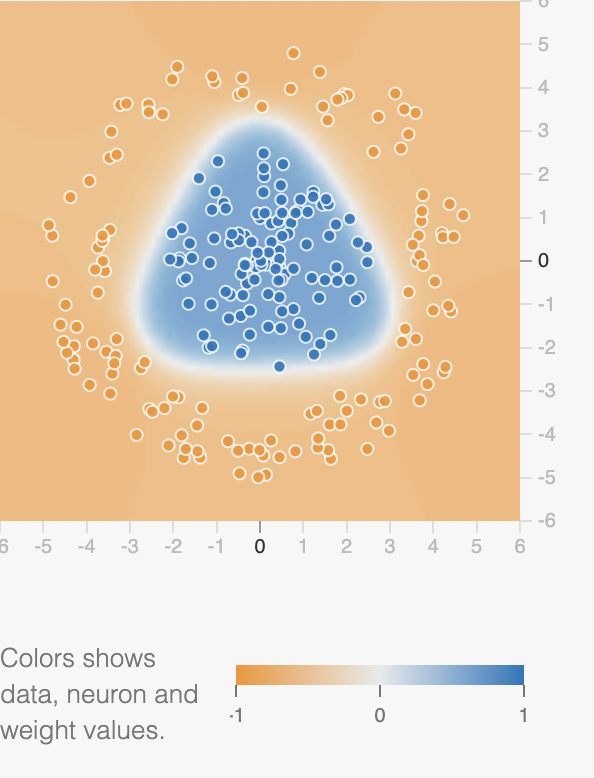

This is the decision boundary when using the Tanh activation function. As we can observe, the decision boundary is smooth and nonlinear, effectively separating the two classes in the dataset.

### Linear Activation:

Test loss 0.532
Training loss 0.484

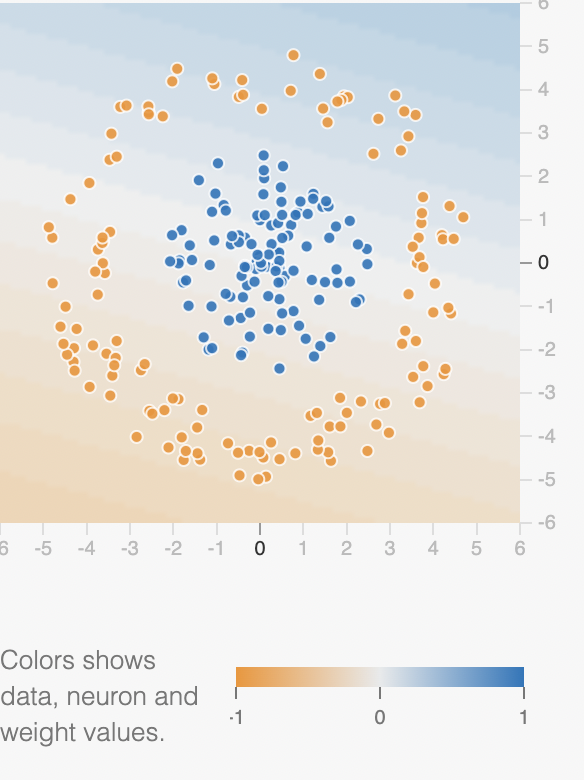

Here we see the decision boundary when using the Linear activation function. The decision boundary appears to be more linear and simplistic, failing to accurately separate the two classes in the dataset.

### Qualitative Differences in Decision Boundaries:

1. Tanh Activation Function: 

    The decision boundary is nonlinear and appears more flexible, adjusting itself to better fit the data distribution. It effectively separates the two classes.
    
2. Linear Activation Function: 

    The decision boundary is straight and lacks the flexibility to capture the data's complex distribution. This results in misclassifications.
    
### Reason for the Differences:

The primary reason for the observed differences in the decision boundaries is the inherent properties of the activation functions:

1. Tanh Activation Function: 

    The hyperbolic tangent function, or tanh, is an S-shaped curve that can take any real-valued number and map it into a value between -1 and 1. Its nonlinearity allows the neural network to learn complex patterns and relationships in the data. This ability to introduce nonlinearity into the model makes it more suitable for problems where the data is not linearly separable.

2. Linear Activation Function: 

    This function does not transform the input; it's just a straight line. As a result, no matter how many layers you stack in the neural network, the final output will still be a linear combination of inputs. This means that the neural network will not be able to capture complex patterns in the data, resulting in a simplistic linear decision boundary.

In summary, for datasets that are not linearly separable, nonlinear activation functions like Tanh provide the network with the capability to learn and adapt to the data's intricacies. In contrast, linear activation functions restrict the model to only linear transformations, limiting its expressiveness.


We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.

### b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT.


1.   Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.
2.   What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?

### Tanh Activation - 2 neurons:

Test loss 0.262
Training loss 0.216

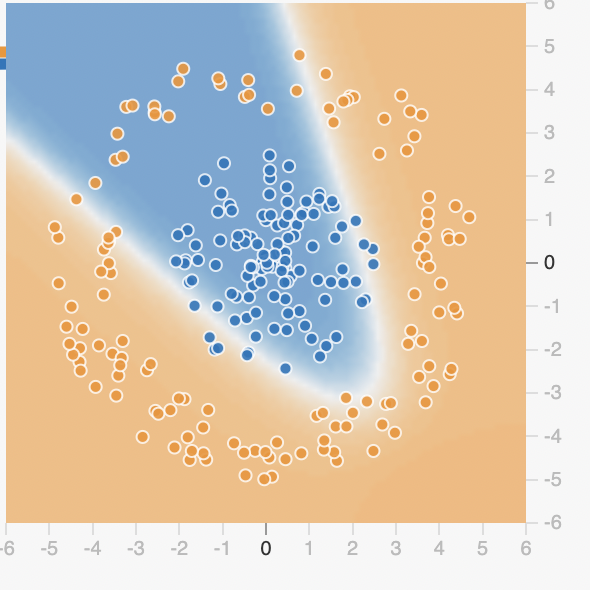
Here we see the decision boundary when using 2 neurons in the hidden layer. The decision boundary appears somewhat simplified, and while it attempts to separate the two classes, there are evident areas where misclassification occurs.

### Tanh Activation - 8 neurons:

Test loss 0.023
Training loss 0.009

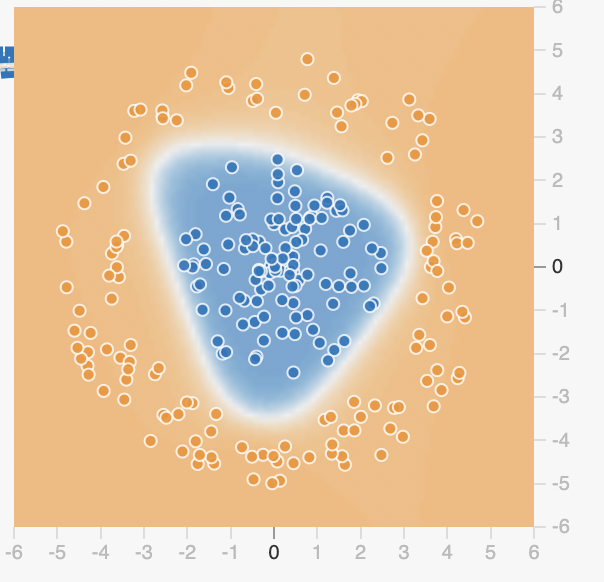
With 8 neurons in the hidden layer, we observe a more intricate and refined decision boundary. It seems to adapt better to the data distribution, yielding fewer misclassifications compared to the model with only 2 neurons.

### Observations:

1. 2 Neurons: 

    The decision boundary is a bit oversimplified and cannot capture the intricate patterns of the dataset effectively. This results in a higher training and test loss.

2. 8 Neurons: 

    The decision boundary appears more detailed and closely follows the data distribution. The network can model the complex patterns in the data more effectively, resulting in a significantly lower training and test loss.

### Discussion:

The number of neurons in a hidden layer affects the model's capacity. A higher number of neurons can increase the network's ability to learn complex patterns from the data. However, it's a double-edged sword: while increased capacity can lead to better modeling of training data, it can also cause overfitting if the model becomes too complex.

In this case, increasing the neurons from 2 to 8 improved the decision boundary and reduced both training and test loss. This suggests that the added complexity (up to 8 neurons) was beneficial in modeling the underlying patterns in the dataset without overfitting.

### c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.

1.   For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.
2.   What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).

### Learning rate: 10
Epochs: 100 
Test loss 0.664
Training loss 0.544

Epochs: 500
Test loss 0.627
Training loss 0.520
    
Epochs: 1000
Test loss 0.608
Training loss 0.496

### Learning rate: 1
Epochs: 100 
Test loss 0.051
Training loss 0.029

Epochs: 500
Test loss 0.068
Training loss 0.037

Epochs: 1000
Test loss 0.062
Training loss 0.039

### Learning rate: 0.1
Epochs: 100 
Test loss 0.032
Training loss 0.034

Epochs: 500
Test loss 0.025
Training loss 0.005

Epochs: 1000
Test loss 0.026
Training loss 0.003

### Learning rate: 0.01
Epochs: 100 
Test loss 0.330
Training loss 0.308

Epochs: 500
Test loss 0.060
Training loss 0.057

Epochs: 1000
Test loss 0.060
Training loss 0.057

### Learning rate: 0.0001
Epochs: 100 
Test loss 0.500
Training loss 0.512

Epochs: 500
Test loss 0.505
Training loss 0.502

Epochs: 1000
Test loss 0.511
Training loss 0.495


### 1. Observations on Change of Loss vs Learning Rate:
**Learning Rate: 10:** The training and test losses are relatively high, indicating that this learning rate might be too large. The model might be overshooting the optimal weights during training, resulting in oscillations and preventing convergence.

**Learning Rate: 1:** The training and test losses are much lower than with a learning rate of 10, and they seem to stabilize over more epochs. This learning rate seems to be effective for this dataset and model configuration.

**Learning Rate: 0.1:** This learning rate gives the best results in terms of both training and test losses. The model converges quickly and achieves very low losses, suggesting that this learning rate allows for a smooth optimization process.

**Learning Rate: 0.01:** The losses are higher initially (at 100 epochs) but reduce significantly by 500 epochs. This indicates that the learning rate might be a bit slow, requiring more epochs to converge to a good solution.

**Learning Rate: 0.0001:** The training and test losses are relatively high and show minimal improvement even with more epochs. This learning rate is likely too small, causing the model to update its weights too slowly and, thus, taking a longer time to converge.

### 2. Observations on Change of Loss vs Epoch Numbers:

1. With a higher learning rate (e.g., 10), the losses decrease slightly as the number of epochs increases, but they remain relatively high.

2. For a moderate learning rate (e.g., 1), the losses are low initially but tend to slightly increase or stabilize as epochs increase, suggesting possible slight overfitting.

3. For an optimal learning rate (e.g., 0.1), the losses decrease significantly with more epochs, showing the benefits of extended training.

4. With a smaller learning rate (e.g., 0.01), the model benefits from additional epochs, as seen by the significant loss reduction from 100 to 500 epochs. However, the losses then stabilize, suggesting convergence.

5. For a very small learning rate (e.g., 0.0001), the losses change minimally with more epochs, reinforcing the idea that the learning rate is too slow.

### 3. Observations on Training and Test Loss Curves:

For the learning rate of 10 at 100 epochs:

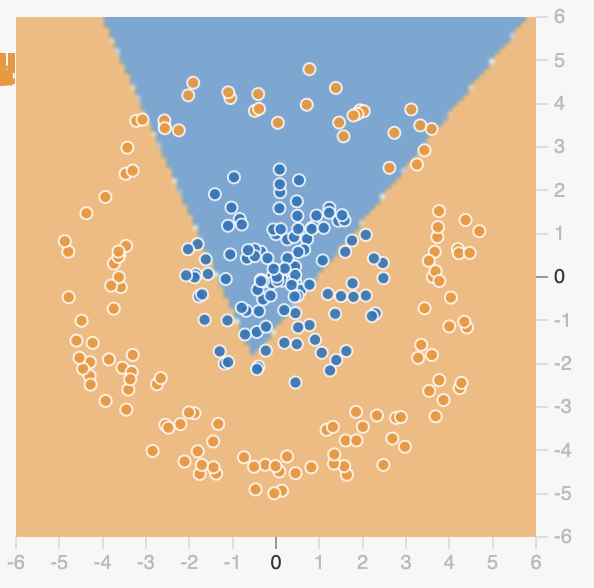

The decision boundary is highly erratic and doesn't seem to be converging to a stable solution. This states that a high learning rate causes overshooting during optimization.

The training and test loss curves show significant noise and oscillations, indicating instability in the learning process. This is consistent with the notion that a high learning rate can lead to weight updates that jump around the optimal values instead of smoothly converging.

For the learning rate of 10 at 500 epochs:

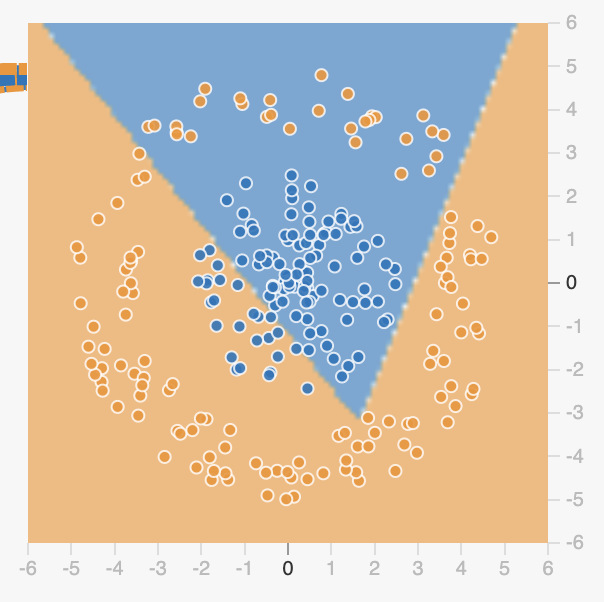

The decision boundary remains erratic, although it appears slightly more structured than at 100 epochs. It still doesn't provide an optimal separation of the two classes.

The training and test loss curves continue to display noise and oscillations, indicating ongoing instability in the optimization process.

For the learning rate of 10 at 1000 epochs:

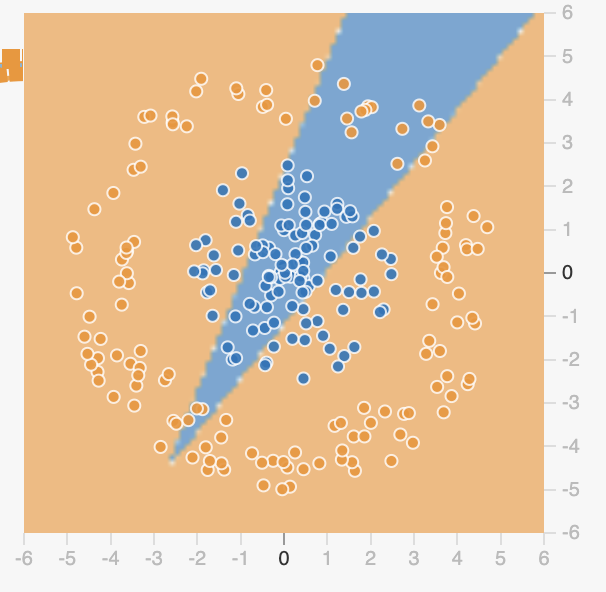

The decision boundary, while slightly refined compared to earlier epochs, remains inconsistent and doesn't effectively separate the two classes.

The training and test loss curves still display significant noise, which is characteristic of a high learning rate causing overshooting during optimization.

In summary:

1. A very high learning rate can cause overshooting and prevent the model from converging.

2. A moderate learning rate allows the model to converge effectively but might lead to slight overfitting if trained for too long.

3. An optimal learning rate results in quick convergence and low losses.

4. A very low learning rate makes the model converge very slowly, potentially requiring a much larger number of epochs to reach an optimal solution.

It's essential to choose an appropriate learning rate for the problem at hand and monitor both training and test losses to avoid overfitting and ensure effective convergence.

### d) **(4 pts)** Effect of the number of layers:

1.   Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.
2.   Comment on your final models and decision boundaries and observe your training and test loss curves as well.



### The model with 1 hidden layer and 4 neurons:

learning rate = 0.03, epoch = 1000, activation = ReLu

Test loss 0.008
Training loss 0.010

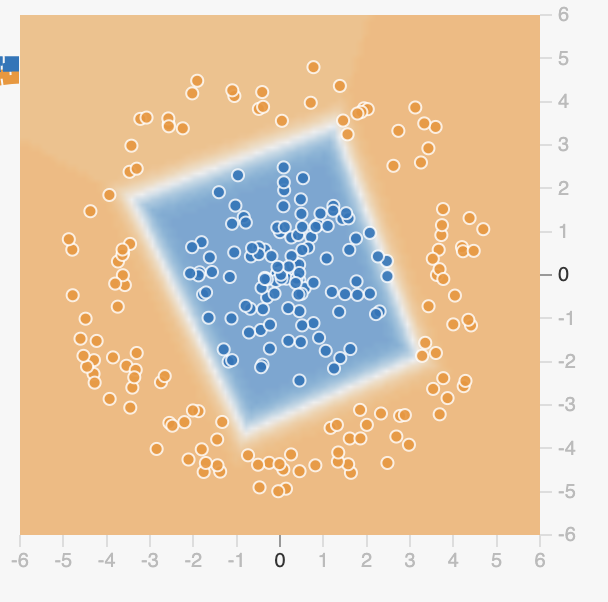

The decision boundary is smooth and does an excellent job of separating the two classes in the dataset.

The training and test loss curves converge smoothly without significant noise or oscillations, indicating a stable learning process.

### The model with 2 hidden layers:

learning rate = 0.03, epoch = 1000, activation = ReLu

Test loss 0.002
Training loss 0.001

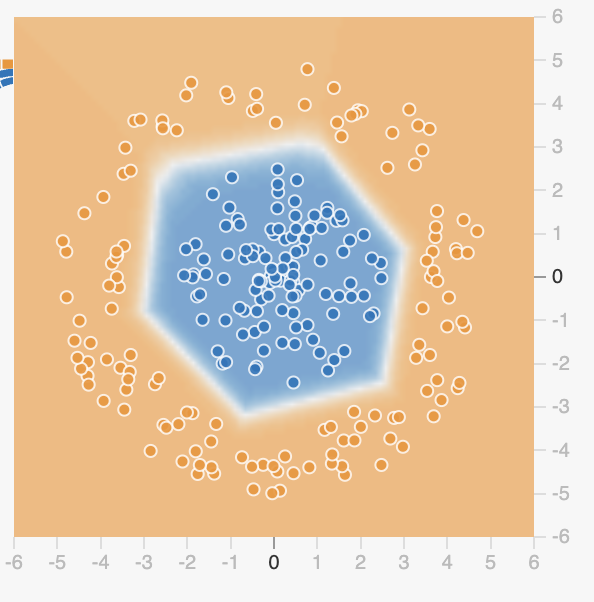

The decision boundary is intricate and does a stellar job of separating the two classes in the dataset. The boundary is even more refined compared to the single-layer model.

The training and test loss curves converge rapidly and smoothly. They settle at extremely low values, suggesting that the model fits the data exceptionally well.

### Observations:

**1 Hidden Layer with 4 Neurons:**

1. The decision boundary is effective, and the model achieves good training and test losses.
2. The training process is stable, as indicated by the smooth convergence of the loss curves.

**2 Hidden Layers (4 Neurons & 3 Neurons):**

1. The decision boundary is even more refined and closely follows the data distribution, leading to superior separation of the classes.
2. The training and test losses are remarkably low, suggesting that the added complexity of an additional layer allows the model to capture the underlying patterns in the data more effectively.

### Comments:

**1. Depth Matters:** The addition of an extra hidden layer provides the model with increased capacity to learn complex patterns in the data. This is evident from the more refined decision boundary and the lower training and test losses.

**2. Loss Curves:** Both models demonstrate stable and smooth convergence, suggesting that the learning rate and other hyperparameters are well-tuned for this dataset and model configuration.

**3. Decision Boundaries:** The model with 2 hidden layers seems to better adapt to the data's intricacies, achieving a more detailed decision boundary and resulting in fewer misclassifications.

In conclusion, while both models perform well, the one with 2 hidden layers achieves superior results, highlighting the benefits of increased model depth for this particular dataset.

### e) Play around with parameters**(4 pts)** 

Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.

### Parameters taken:

Epoch: 1014, Learning rate: 0.01

Activation: Tanh

Regularization: L1

Regularization rate: 0

The ratio of training to test data: 50%

Noise: 0

Batch size: 30

Features: X1, X2, sin(X1)

Hidden layers: 1(4 neurons), 2(2 neurons)

**Output:**

**Test loss 0.010**

**Training loss 0.005** 

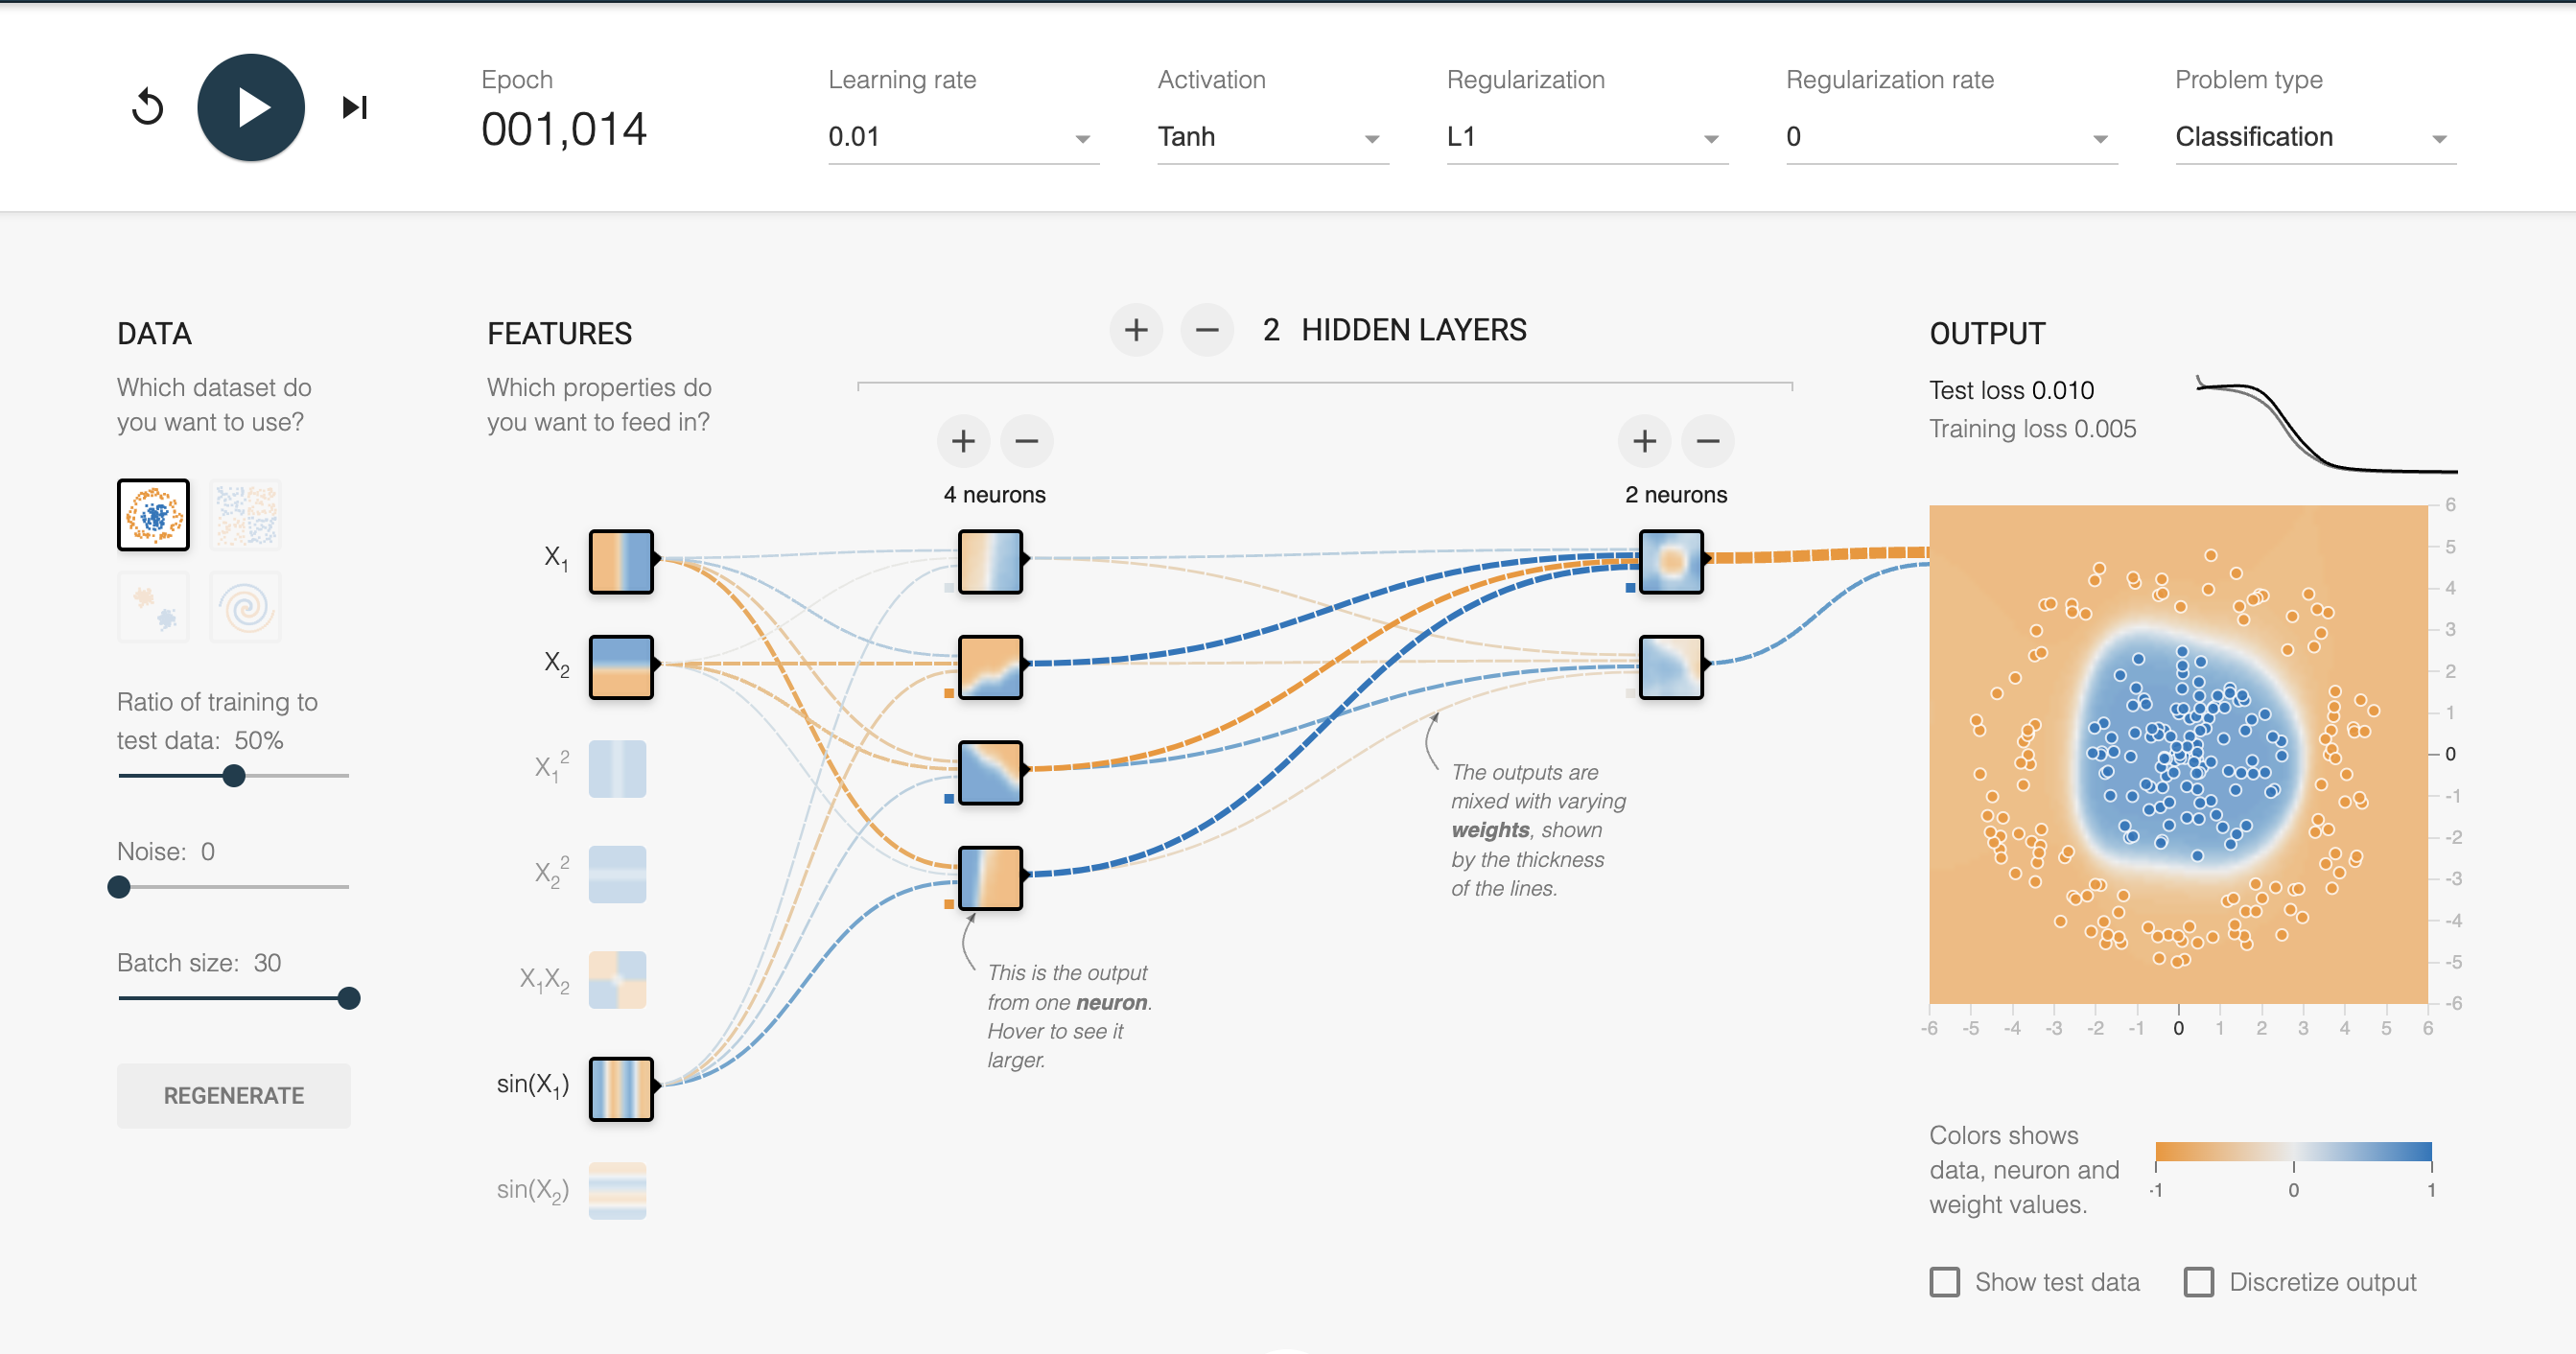

### Comments on the result:

1. Learning Rate (0.01):
A lower learning rate (compared to the default 0.03) ensures that the weight updates are more conservative, allowing for smoother convergence, especially when other complexities (like additional input features or deeper networks) are introduced.

2. Activation (Tanh):
The Tanh activation function introduces non-linearity, which helps the network learn complex patterns. Given the nature of the dataset, Tanh is effective in shaping the decision boundary.

3. Features (X1, X2, sin(X1)):
Introducing the trigonometric feature sin(X1) adds an additional dimension of non-linearity, aiding the model in capturing more intricate patterns. This is particularly beneficial for datasets with cyclic or periodic patterns.

4. Hidden Layers and Neurons:
The network consists of two hidden layers: the first with 4 neurons and the second with 2 neurons. A deeper network (more layers) allows for the composition of more complex functions, improving the model's capacity to learn intricate patterns. The choice of neurons in each layer seems to strike a balance between model complexity and the risk of overfitting.

5. Regularization (L1 with rate 0):
While L1 regularization is chosen, the rate is set to 0, meaning no regularization is effectively applied. Given the low training and test losses, it appears that overfitting isn't a concern with the current architecture and dataset.

6. Decision Boundary:
The decision boundary is smooth and effectively separates the data points, resulting in low training and test losses.

### What Helps:

1. Additional Feature sin(X1): The inclusion of this feature aids in capturing any cyclic patterns in the data.
2. Two Hidden Layers: The depth introduces more complexity, allowing the model to learn intricate patterns effectively.
3. Lower Learning Rate: The reduced learning rate ensures smoother convergence, especially beneficial when the network's complexity is increased.

### What Doesn't Help (or wasn't necessary):

Regularization: Given the current architecture and dataset, regularization doesn't seem to be necessary. The model achieves excellent performance without it, as indicated by the similar low training and test losses.

# Q3. (10 points) - Principal Component Analysis

**Part 1.** (5 points) Briefly explain the main principle behind the Principal Component Analysis algorithm. In what sense is the selection of the eigenvectors to represent the data an optimal choice.  How do you reconstruct (a noisy version of) the original data from the eigenvectors and the scores?

### Principal Component Analysis (PCA)

**Main Principle:**

PCA is a dimensionality reduction technique that aims to represent high-dimensional data in a lower-dimensional space while retaining as much variance as possible. It does this by identifying "directions" (or principal components) in the data that capture the most variability.

**Steps:**
1. **Standardize the data**: 

    Often, the data is centered (mean is subtracted) and scaled (divided by the standard deviation) so that each feature has a mean of zero and a standard deviation of one.

2. **Compute the covariance matrix**: 

    This matrix captures the linear relationships between the variables.

3. **Calculate eigenvectors and eigenvalues of the covariance matrix**: 

    Eigenvectors represent the directions of maximum variance, while the corresponding eigenvalues indicate the magnitude of that variance.

4. **Sort eigenvectors by decreasing eigenvalues**: 

    This gives the order of importance of the eigenvectors.

5. **Choose top \(k\) eigenvectors**: 

    Where \(k\) is the number of dimensions you want to reduce your data to.

**Optimality of Eigenvectors:**

The eigenvectors of the covariance matrix, also known as principal components, provide an optimal representation of the data in the sense that the first principal component captures the maximum variance in the data, the second principal component (which is orthogonal to the first) captures the next highest variance, and so on. This ensures that by selecting the top \(k\) eigenvectors, we retain as much information (variance) as possible from the original data.

**Reconstruction from Eigenvectors and Scores:**

Once you've transformed your data into the lower-dimensional space using PCA, you get what are known as "scores", which are the projections of the original data onto the principal components. 

To reconstruct a noisy approximation of the original data:

1. Multiply the scores by the top \(k\) eigenvectors.
2. Add back the mean of the original data (if it was subtracted during standardization).

This will give you data in the original space, but with reduced dimensions represented as combinations of the original features. It's "noisy" because, during dimensionality reduction, you lose some information, and the reconstruction can't fully capture the intricacies of the original data unless all eigenvectors are used.

To summarise, PCA provides a balance between compressing data (reducing dimensions) and retaining as much of the original information (variance) as possible.

**Part 2**. (5 points) Read this [article](https://erdem.pl/2020/04/t-sne-clearly-explained) on t-SNE, a dimensionality reduction technique for visualization and explain it in your own words in one or two paragraphs.

## t-SNE:

t-Distributed Stochastic Neighbor Embedding, is a popular visualization tool designed to simplify and represent high-dimensional data in a 2D or 3D space. Think of it as a method to create a map of data where similar items are placed close together, making it easier to spot natural groupings or clusters. The magic behind t-SNE is its ability to emphasize local similarities. In other words, it prioritizes ensuring that data points which are close in the original complex dataset remain close in the simplified visualization. This makes it particularly adept at revealing hidden structures or clusters within data.

However, while t-SNE is excellent at preserving these local relationships, it's less concerned with maintaining the exact distances between more dissimilar points or clusters. This means that while clusters are reliably represented, the broader spacing between them in the visual output might not always carry significant meaning. It's also worth noting that t-SNE can produce slightly different visualizations based on its settings or when applied multiple times. This variability underscores its primary role as an exploratory tool, aiding in initial data understanding rather than precise measurement.

To summarise, t-SNE provides a bird's-eye view of how data points relate, offering a clearer picture of complex datasets and highlighting inherent groupings that might be hard to discern otherwise.

# Q4. (20 points) - Principal Component Analysis

In this problem we will be applying PCA and T-SNE on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

First use Principal Component Analysis (PCA) to solve this problem.  

* **Part 1. (5 points)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q4data.csv" file provided as a dataframe df.

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X.

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    




In [13]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("Q4data.csv")


In [15]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42)

scalar = StandardScaler()

### START CODE ###
### Scale the dataset
X_train_scaled = scalar.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scalar.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape
### END CODE ###

((13820, 81), (7443, 81))

* **Part 2 (5 points)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively).

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

In [16]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    ### START CODE ###
    ## Fit PCA
    pca = PCA(n_components=num)
    pca.fit(X_train_scaled)

    ### END CODE ###

    ### START CODE ###
    
    ## Transform Data
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    var = np.cumsum(pca.explained_variance_ratio_)
    ### END CODE ###

    print("Cumulative variance explained by {} components is {}".format(num,var[num-1])) #cumulative sum of variance explained with [n] features



Cumulative variance explained by 3 components is 0.5894367932307172
Cumulative variance explained by 20 components is 0.9694250458207531
Cumulative variance explained by 40 components is 0.9961463752178957
Cumulative variance explained by 60 components is 0.9995333353596916
Cumulative variance explained by 81 components is 1.0000000000000007


* **Part 3. (5 points)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

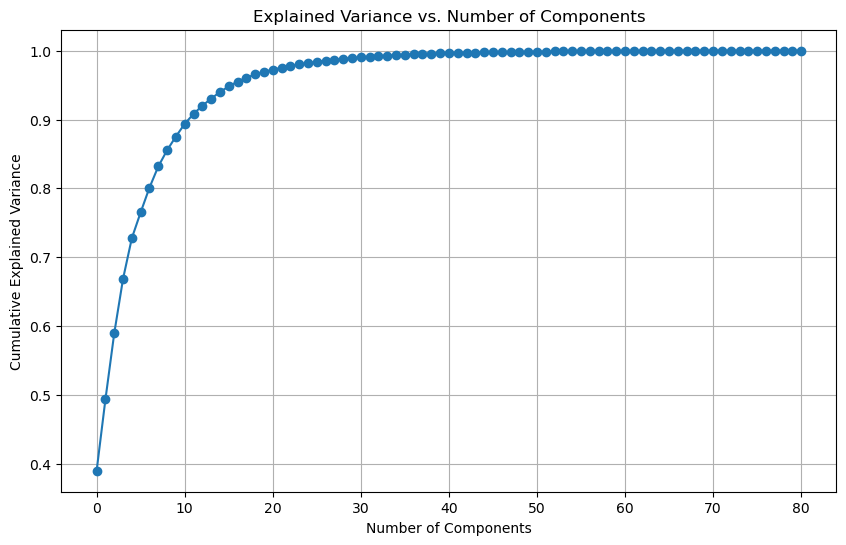

In [17]:
### START CODE ###
# Fit PCA without specifying the number of components to capture the explained variance for all components
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Get the cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

## Plot the explained variance vs number of components
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance,marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
### END CODE ###
plt.show()

## Observations:

The plot illustrates the cumulative variance explained by the principal components as the number of components increases.

From the plot, we can draw the following observations:

#### Rapid Increase Initially: 

The curve shows a sharp increase in explained variance with the first few components, meaning these initial components capture a significant amount of the variance in the data.

#### Diminishing Returns: 

As we add more components, the rate at which the explained variance increases starts to slow down, indicating diminishing returns. This is particularly evident after about 20 components.

#### Plateau: 

After a certain number of components (around 60 in this case), the curve becomes almost flat. This indicates that adding more components beyond this point doesn't contribute much to explaining additional variance.

From a dimensionality reduction perspective, this plot is useful in determining the number of principal components to retain while preserving a desired amount of variance. For example, if we're okay with capturing about 97% of the variance, we can reduce our data to just 20 components.

* **Part 4. (5 points)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and show how adjusted $R^2$ varies as a function of # of components.(There will be a total of 5 ${R^2}$ score).


In [18]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:

    ### START CODE ###
    ## Fit PCA components
    pca = PCA(n_components=num)
    
    ### END CODE ###


    ### START CODE ###
    ## Transform train and test data
    
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_new = pca.transform(X_test_scaled)
    
    ### END CODE ###
    
    ### START CODE ###
    ## Fit LR and compute R-square and adjusted R-squared
    lr = LinearRegression()
    lr.fit(X_train_pca, Y_train)
   
    Y_pred = lr.predict(X_test_new)
    r_squared = r2_score(Y_test, Y_pred)
    
    ### END CODE ###

    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_new.shape[1]-1)
    print("Number of Components:", num, ", Adjusted R^2",adjusted_r_squared)

Number of Components: 3 , Adjusted R^2 0.4927514891353667
Number of Components: 20 , Adjusted R^2 0.6240408514891318
Number of Components: 40 , Adjusted R^2 0.6882653417963123
Number of Components: 60 , Adjusted R^2 0.7155823572434956
Number of Components: 81 , Adjusted R^2 0.7277522695494435


# Q5. (10 points) PCA vs T-SNE
* **Part 1.** **(3 points)** Now apply T-SNE to the dataset given above in Q4. You are required to carry out the following tasks:



1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42
2.   Apply the t-SNE model to the training dataset











In [19]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE model
tsne_model = TSNE(n_components=3, perplexity=300, n_iter=300, random_state=42)

### END CODE ###

### START CODE ###
## Fit and transform the data
X_train_tsne= tsne_model.fit_transform(X_train_scaled)

X_train_tsne[:5]
### END CODE ###

array([[-6.2350947e-01, -5.0902500e+00, -2.6343939e+00],
       [-4.3001324e-01, -4.9828749e+00, -3.3267102e+00],
       [-3.5385609e+00, -9.3623316e-01,  4.0785360e+00],
       [ 5.3896961e+00,  9.5014889e-03, -2.6047828e+00],
       [-5.3388137e-01,  4.1562262e+00,  2.9102520e-03]], dtype=float32)

* **Part 2.** (3 points) For this part use a small subset of 500 samples of the training dataset and plot the first three t-SNE components similar to the PCA implementation above

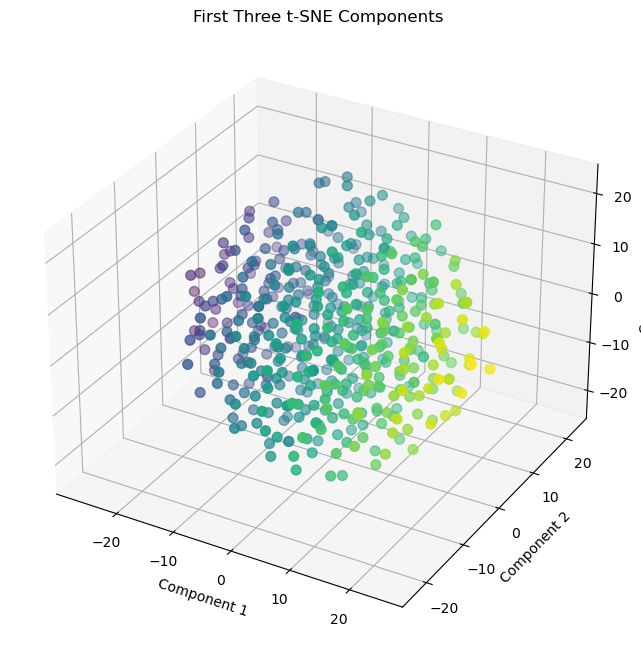

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Selecting a subset of 500 samples
subset_indices = np.random.choice(X_train_scaled.shape[0], 500, replace=False)
X_subset_1 = X_train_scaled[subset_indices]

# Apply t-SNE on the subset
X_subset_1_tsne = tsne_model.fit_transform(X_subset_1)

# 3D Plot of the t-SNE components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_subset_1_tsne[:, 0], X_subset_1_tsne[:, 1], X_subset_1_tsne[:, 2],c=X_subset_1_tsne[:, 0], cmap='viridis', s=50)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('First Three t-SNE Components')
plt.show()


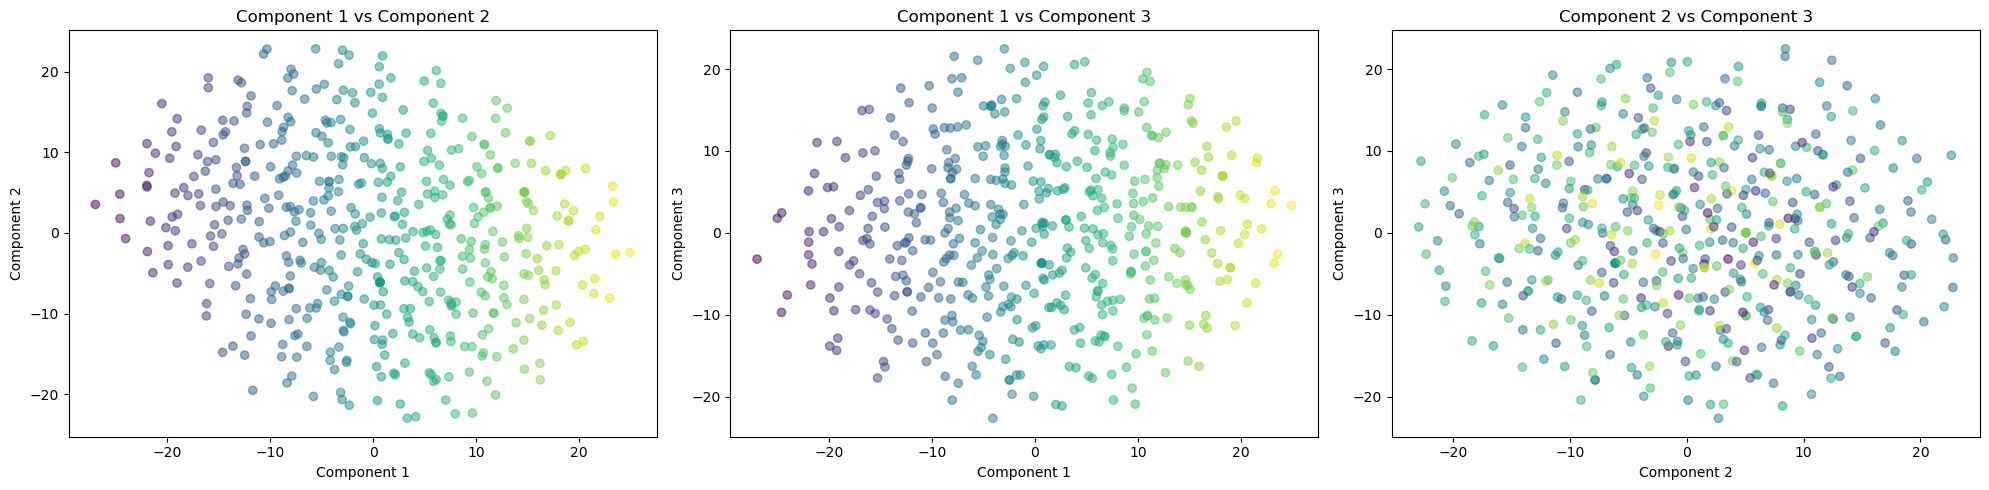

In [24]:
# Creating 2D scatter plots for the t-SNE components
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Component 1 vs Component 2
axs[0].scatter(X_subset_1_tsne[:, 0], X_subset_1_tsne[:, 1],c=X_subset_1_tsne[:, 0], cmap='viridis', alpha=0.5)
axs[0].set_title("Component 1 vs Component 2")
axs[0].set_xlabel("Component 1")
axs[0].set_ylabel("Component 2")

# Component 1 vs Component 3
axs[1].scatter(X_subset_1_tsne[:, 0], X_subset_1_tsne[:, 2],c=X_subset_1_tsne[:, 0], cmap='viridis', alpha=0.5)
axs[1].set_title("Component 1 vs Component 3")
axs[1].set_xlabel("Component 1")
axs[1].set_ylabel("Component 3")

# Component 2 vs Component 3
axs[2].scatter(X_subset_1_tsne[:, 1], X_subset_1_tsne[:, 2],c=X_subset_1_tsne[:, 0], cmap='viridis', alpha=0.5)
axs[2].set_title("Component 2 vs Component 3")
axs[2].set_xlabel("Component 2")
axs[2].set_ylabel("Component 3")

plt.tight_layout()
plt.show()


* **Part 3. (4 points)** Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

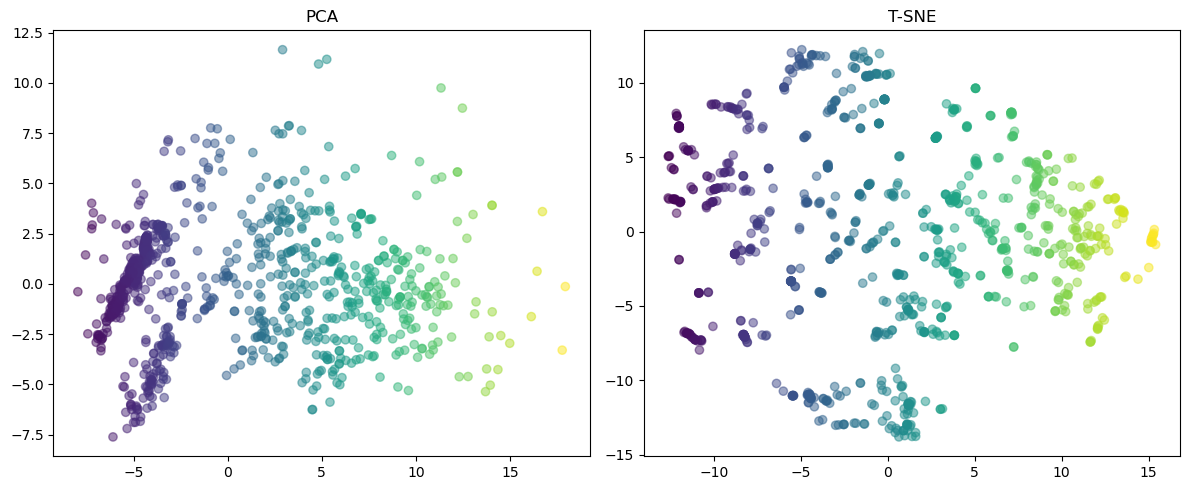

In [25]:
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# First subplot (left)

### START CODE ###

# Select the first 1000 data points
subset_indices = np.random.choice(X_train_scaled.shape[0], 1000, replace=False)
X_subset = X_train_scaled[subset_indices]

# Obtain components from PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

# Apply t-SNE on the subset
tsne_subset = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne_subset.fit_transform(X_subset)
### END CODE ###

plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
plt.title('PCA')

### START CODE ###
### scatter plot for PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=X_pca[:, 0], cmap='viridis', alpha=0.5)
### END CODE ###


# Second subplot (right)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot

### START CODE ###
### scatter plot for t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=X_tsne[:, 0], cmap='viridis', alpha=0.5)

### END CODE ###

plt.title('T-SNE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()